In [1]:
#This code pulls the data from the SWARM Constelation Satellites A, B and C for the Mag Data Collection. See ReadMe Climate change NNL Readme on data source and refernces for more details
#We explored various models and worked with the papers to inform our analysis further 
#the last model in this notebook is what we used for our presentation to inform the predcition of the maximum temperature in the second notebook 
# Model chosen: LOESS Smoothing for F (Magnetic Field Intensity n/T) which complements the CHAOS model, we used it to inform us of anomaly arrival to the area of interest in Argentina ( Cordoba and Sante Fe) see code for Lat and Longitud  

from viresclient import SwarmRequest
request = SwarmRequest()

import datetime as dt
from viresclient import SwarmRequest

request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B","SW_OPER_MAGB_LR_1B","SW_OPER_MAGC_LR_1B")#,"SW_OPER_TECATMS_2F", "SW_OPER_TECBTMS_2F", "SW_OPER_TECCTMS_2F")
#request.set_collection("SW_OPER_TECCTMS_2F")
#  measurements=["F", "B_NEC","Absolute_VTEC" ],
#SwarmRequest().available_collections()


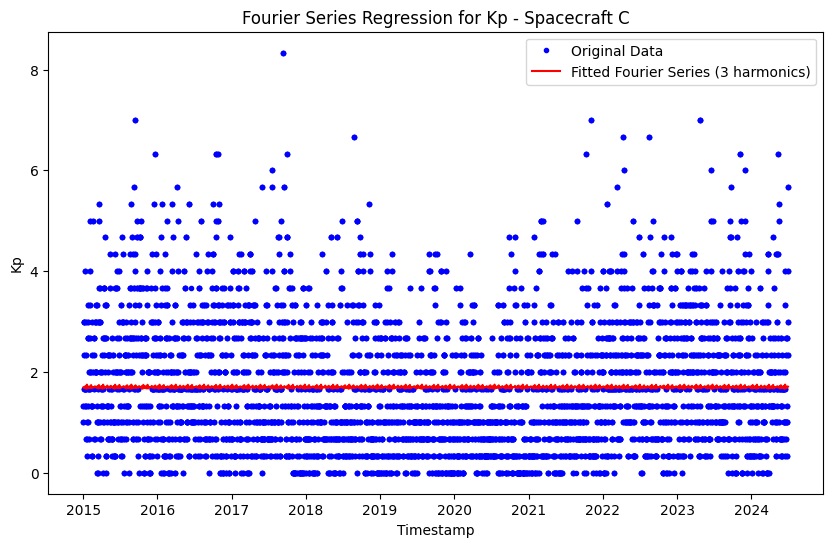

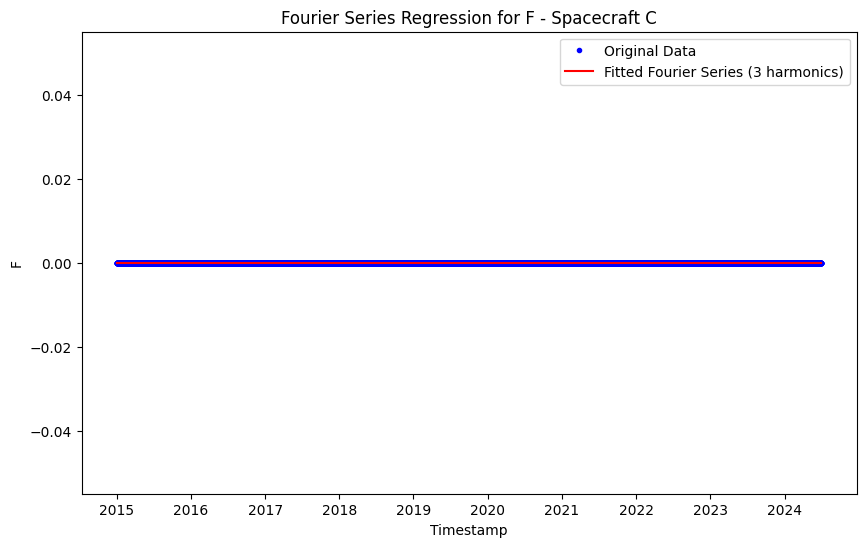

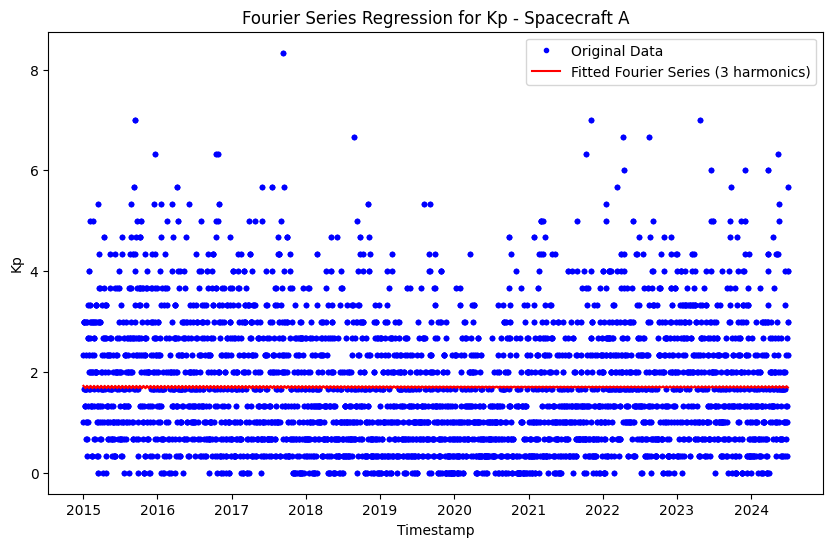

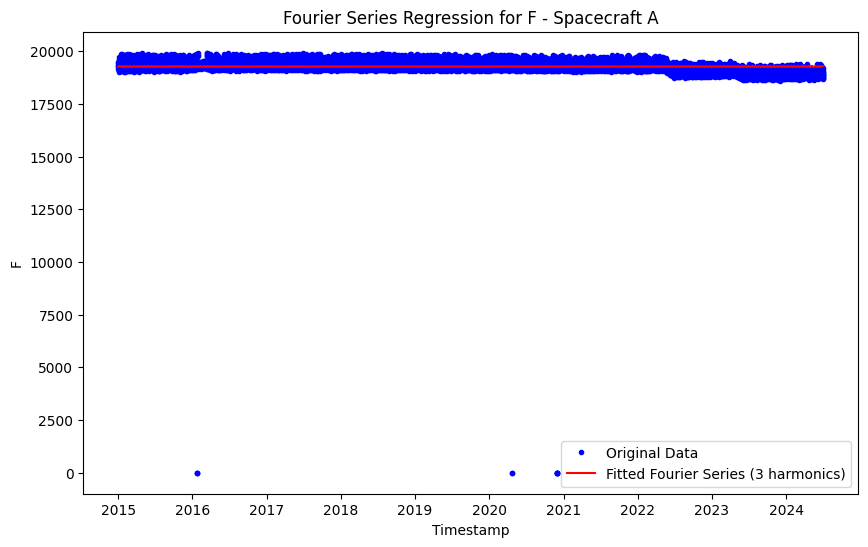

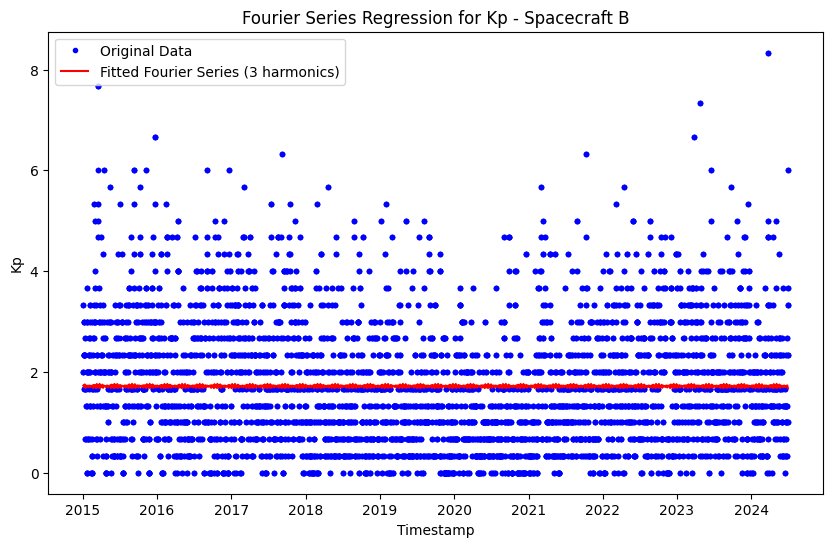

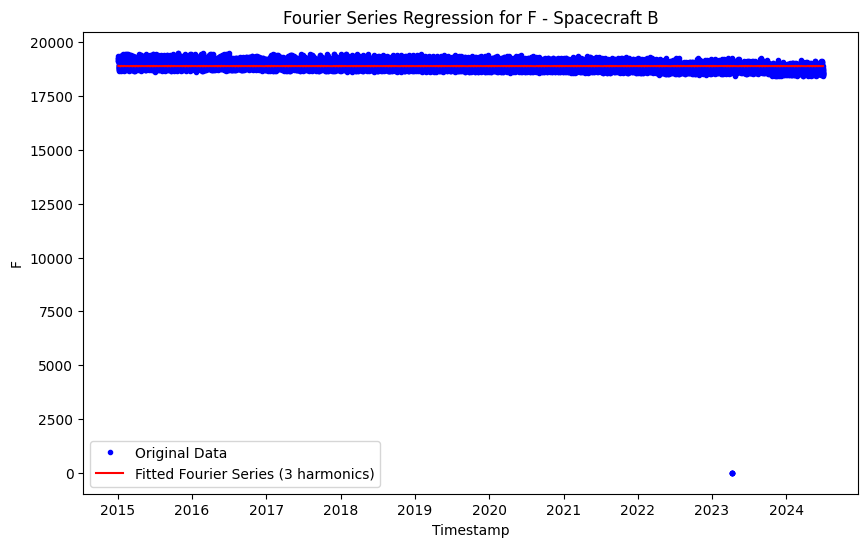

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Fourier series function with n harmonics
def fourier_series(x, *params):
    result = np.zeros_like(x)
    # params are organized as [a0, a1, b1, a2, b2, ..., an, bn]
    a0 = params[0]
    result += a0
    num_harmonics = (len(params) - 1) // 2
    for i in range(1, num_harmonics + 1):
        a = params[2 * i - 1]
        b = params[2 * i]
        result += a * np.sin(i * x) + b * np.cos(i * x)
    return result

# Prepare the data (assuming your DataFrame is df)
df['Timestamp_numeric'] = (pd.to_datetime(df['Timestamp']) - pd.to_datetime(df['Timestamp']).min()).dt.total_seconds()

# Number of harmonics to fit (adjust this number based on how complex you want the model)
n_harmonics = 3

# Iterate through each 'Spacecraft'
spacecrafts = df['Spacecraft'].unique()
for spacecraft in spacecrafts:
    df_spacecraft = df[df['Spacecraft'] == spacecraft]
    
    for variable in ['Kp', 'F']:
        # Fit the Fourier series to the data
        initial_guess = [np.mean(df_spacecraft[variable])] + [0] * (2 * n_harmonics)
        params, params_covariance = curve_fit(
            fourier_series, 
            df_spacecraft['Timestamp_numeric'], 
            df_spacecraft[variable], 
            p0=initial_guess
        )

        # Generate the fitted curve
        x_fit = np.linspace(df_spacecraft['Timestamp_numeric'].min(), df_spacecraft['Timestamp_numeric'].max(), 1000)
        y_fit = fourier_series(x_fit, *params)

        # Convert x_fit back to datetime for plotting
        x_fit_dates = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(x_fit, unit='s')

        # Plot the original data and the fitted curve
        plt.figure(figsize=(10, 6))
        plt.plot(df_spacecraft['Timestamp'], df_spacecraft[variable], 'b.', label='Original Data')
        plt.plot(x_fit_dates, y_fit, 'r-', label=f'Fitted Fourier Series ({n_harmonics} harmonics)')
        plt.xlabel('Timestamp')
        plt.ylabel(variable)
        plt.title(f'Fourier Series Regression for {variable} - Spacecraft {spacecraft}')
        plt.legend()
        plt.show()


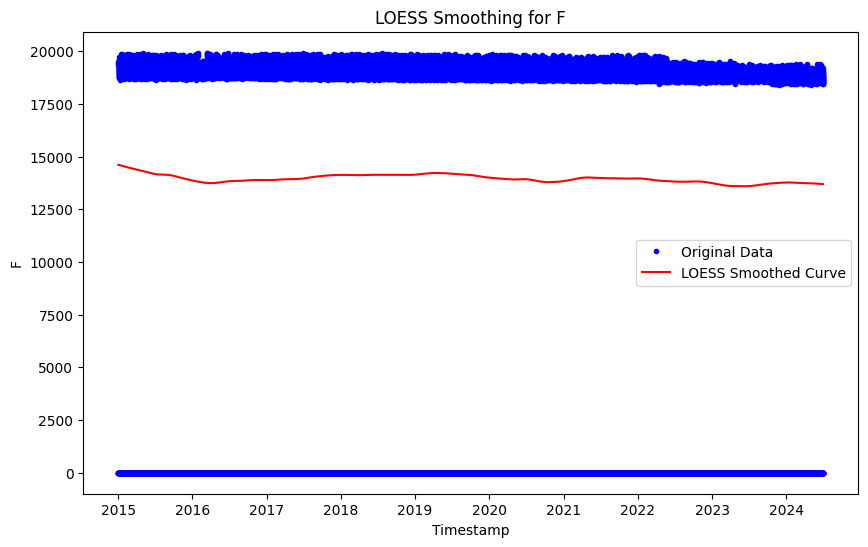

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has 'Date' and 'Kp' columns

# Prepare the data
df['Date_numeric'] = (pd.to_datetime(df['Timestamp']) - pd.to_datetime(df['Timestamp']).min()).dt.total_seconds()

# Apply LOESS smoothing
loess_smoothed = lowess(df['F'], df['Date_numeric'], frac=0.1)  # Adjust frac for more or less smoothing

# Convert the smoothed x-values back to datetime
x_loess_dates = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[:, 0], unit='s')

# Plot the original data and the LOESS-smoothed curve
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['F'], 'b.', label='Original Data')
plt.plot(x_loess_dates, loess_smoothed[:, 1], 'r-', label='LOESS Smoothed Curve')
plt.xlabel('Timestamp')
plt.ylabel('F')
plt.title('LOESS Smoothing for F')
plt.legend()
plt.show()


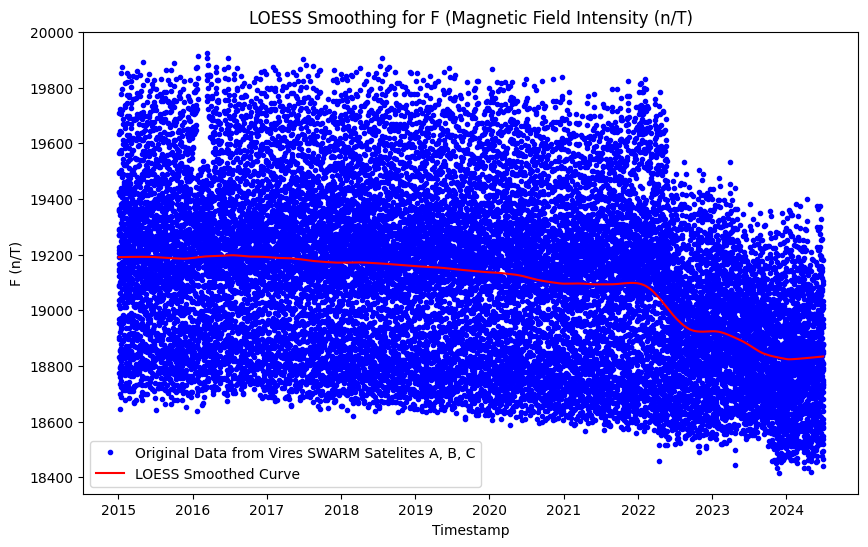

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has 'Timestamp' and 'F' columns

# Remove rows where 'F' is 0
df = df[df['F'] != 0]

# Prepare the data
df['Date_numeric'] = (pd.to_datetime(df['Timestamp']) - pd.to_datetime(df['Timestamp']).min()).dt.total_seconds()

# Apply LOESS smoothing
loess_smoothed = lowess(df['F'], df['Date_numeric'], frac=0.1)  # Adjust frac for more or less smoothing

# Convert the smoothed x-values back to datetime
x_loess_dates = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[:, 0], unit='s')

# Plot the original data and the LOESS-smoothed curve
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['F'], 'b.', label='Original Data from Vires SWARM Satelites A, B, C')
plt.plot(x_loess_dates, loess_smoothed[:, 1], 'r-', label='LOESS Smoothed Curve')
plt.xlabel('Timestamp')
plt.ylabel('F (n/T)')
plt.title('LOESS Smoothing for F (Magnetic Field Intensity (n/T)')
plt.legend()
plt.show()


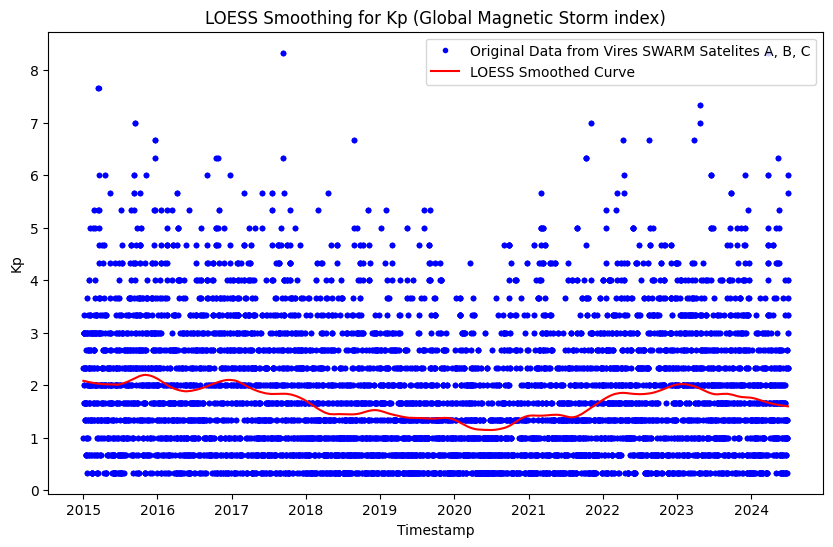

Dates with Kp values above 5:
2015-02-24
2015-03-17
2015-03-18
2015-04-16
2015-05-13
2015-07-05
2015-08-23
2015-09-07
2015-09-09
2015-09-11
2015-10-08
2015-11-07
2015-12-14
2015-12-20
2015-12-21
2016-01-21
2016-02-16
2016-03-11
2016-04-08
2016-06-05
2016-09-02
2016-10-13
2016-10-25
2016-10-29
2016-12-21
2017-03-02
2017-05-27
2017-07-16
2017-07-17
2017-09-08
2017-09-15
2017-10-15
2018-02-27
2018-04-20
2018-08-26
2018-11-05
2019-02-01
2019-08-05
2019-09-01
2021-03-01
2021-10-12
2021-11-04
2022-01-19
2022-03-05
2022-03-13
2022-04-10
2022-04-14
2022-08-17
2023-03-23
2023-04-23
2023-04-24
2023-06-16
2023-09-24
2023-12-01
2023-12-17
2024-03-24
2024-05-12
2024-05-17
2024-06-28


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has 'Timestamp' and 'F' columns

# Remove rows where 'F' is 0
df = df[df['Kp'] != 0]

# Prepare the data
df['Date_numeric'] = (pd.to_datetime(df['Timestamp']) - pd.to_datetime(df['Timestamp']).min()).dt.total_seconds()

# Apply LOESS smoothing
loess_smoothed = lowess(df['Kp'], df['Date_numeric'], frac=0.1)  # Adjust frac for more or less smoothing

# Convert the smoothed x-values back to datetime
x_loess_dates = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[:, 0], unit='s')

# Plot the original data and the LOESS-smoothed curve
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Kp'], 'b.', label='Original Data from Vires SWARM Satelites A, B, C')
plt.plot(x_loess_dates, loess_smoothed[:, 1], 'r-', label='LOESS Smoothed Curve')
plt.xlabel('Timestamp')
plt.ylabel('Kp')
plt.title('LOESS Smoothing for Kp (Global Magnetic Storm index)')
plt.legend()
plt.show()

#outlier dates for KP
import pandas as pd

# Filter the DataFrame to find Kp values above 5
outliers = df[df['Kp'] > 5]

# Extract the dates corresponding to these outliers
outlier_dates = pd.to_datetime(outliers['Timestamp']).dt.date

# Print the outlier dates
print("Dates with Kp values above 5:")
for date in outlier_dates.unique():
    print(date)


C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


The date where the significant variation starts is approximately: 2022-02-02


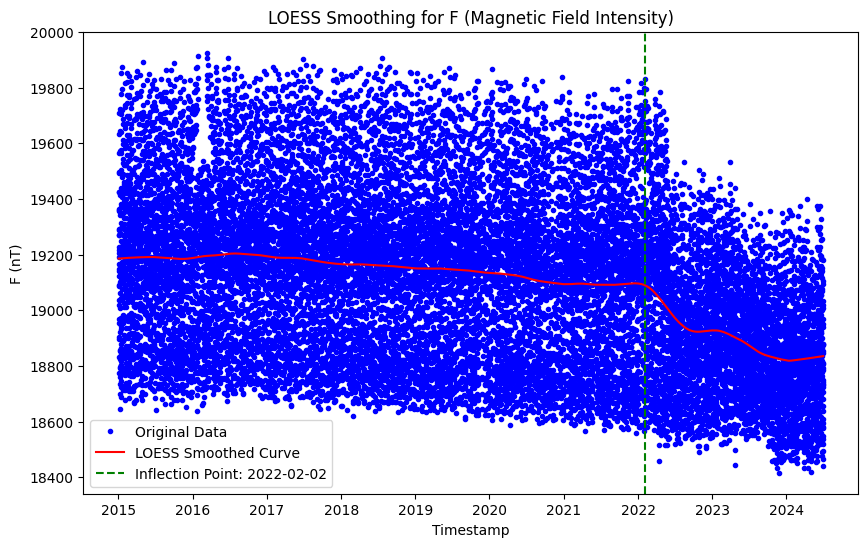

In [116]:
#Model chosen for our reserch to inform Max Annual Temp predictions 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has 'Timestamp' and 'F' columns

# Remove rows where 'F' is 0
df = df[df['F'] != 0]

# Prepare the data
df['Date_numeric'] = (pd.to_datetime(df['Timestamp']) - pd.to_datetime(df['Timestamp']).min()).dt.total_seconds()

# Apply LOESS smoothing
loess_smoothed = lowess(df['F'], df['Date_numeric'], frac=0.1)

# Calculate the derivative of the smoothed curve
derivatives = np.gradient(loess_smoothed[:, 1], loess_smoothed[:, 0])

# Find the index where the derivative has the largest change (inflection point)
inflection_point_index = np.argmax(np.abs(np.gradient(derivatives)))

# Get the date corresponding to this inflection point
inflection_point_date = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[inflection_point_index, 0], unit='s')

print(f"The date where the significant variation starts is approximately: {inflection_point_date.date()}")

# Plot the original data and the LOESS-smoothed curve with the inflection point highlighted
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['F'], 'b.', label='Original Data')
plt.plot(pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[:, 0], unit='s'), loess_smoothed[:, 1], 'r-', label='LOESS Smoothed Curve')
plt.axvline(x=inflection_point_date, color='green', linestyle='--', label=f'Inflection Point: {inflection_point_date.date()}')
plt.xlabel('Timestamp')
plt.ylabel('F (nT)')
plt.title('LOESS Smoothing for F (Magnetic Field Intensity)')
plt.legend()
plt.show()


C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\synap\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


Inflection Point 1: 2022-02-02
Inflection Point 2: 2022-03-06
Inflection Point 3: 2022-03-08
Inflection Point 4: 2022-08-07


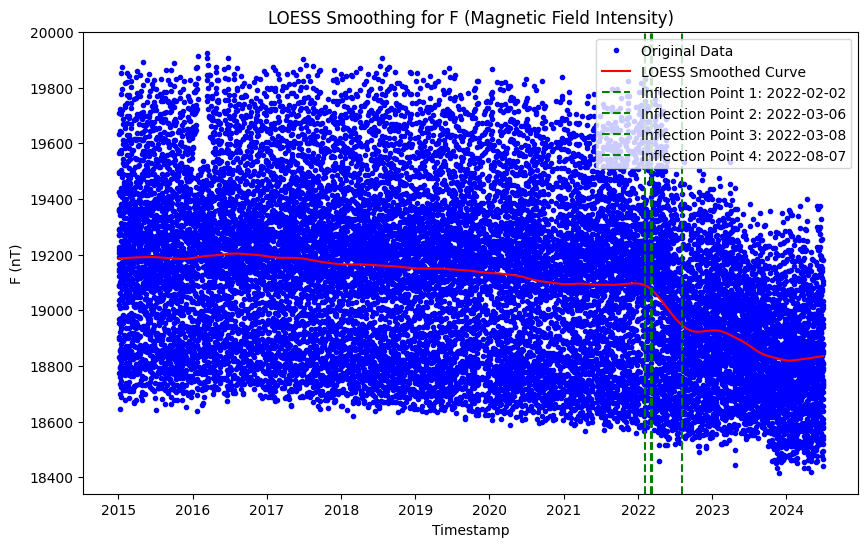

In [120]:
#Exploring other inflection points
#code author Nydia Assaf Aragon assisted by technology

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Assuming df is your DataFrame and has 'Timestamp' and 'F' columns

# Remove rows where 'F' is 0
df = df[df['F'] != 0]

# Prepare the data
df['Date_numeric'] = (pd.to_datetime(df['Timestamp']) - pd.to_datetime(df['Timestamp']).min()).dt.total_seconds()

# Apply LOESS smoothing
loess_smoothed = lowess(df['F'], df['Date_numeric'], frac=0.1)

# Calculate the derivative of the smoothed curve
derivatives = np.gradient(loess_smoothed[:, 1], loess_smoothed[:, 0])

# Find the indices where the derivative has the largest changes (inflection points)
inflection_point_indices = np.argsort(np.abs(np.gradient(derivatives)))[::-1]  # Sort in descending order of magnitude

# Initialize a list to store unique inflection points
unique_inflection_dates = []
unique_inflection_indices = []

# Loop through the sorted indices and pick the top 4 unique dates
for idx in inflection_point_indices:
    inflection_date = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[idx, 0], unit='s')
    inflection_date_str = inflection_date.date()
    
    # Only add this inflection point if its date is not already in the list
    if inflection_date_str not in unique_inflection_dates:
        unique_inflection_dates.append(inflection_date_str)
        unique_inflection_indices.append(idx)
    
    # Stop when we've found 4 unique dates
    if len(unique_inflection_dates) == 4:
        break

# Print the inflection points
for i, inflection_date in enumerate(unique_inflection_dates, start=1):
    print(f"Inflection Point {i}: {inflection_date}")

# Plot the original data and the LOESS-smoothed curve with the inflection points highlighted
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['F'], 'b.', label='Original Data')
plt.plot(pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[:, 0], unit='s'), loess_smoothed[:, 1], 'r-', label='LOESS Smoothed Curve')

for i, idx in enumerate(unique_inflection_indices, start=1):
    inflection_date = pd.to_datetime(df['Timestamp'].min()) + pd.to_timedelta(loess_smoothed[idx, 0], unit='s')
    plt.axvline(x=inflection_date, color='green', linestyle='--', label=f'Inflection Point {i}: {inflection_date.date()}')

plt.xlabel('Timestamp')
plt.ylabel('F (nT)')
plt.title('LOESS Smoothing for F (Magnetic Field Intensity)')
plt.legend()
plt.show()
